In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Almiros'
raceDate = '11/6/2023'
surface = 'Tarmac'
competition = 'cup'

link = 'https://www.ewrc-results.com/results/84279-rally-almyros-2023/?s='
startat, no_ss=426519, int(5)
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in range(0,(no_ss)):
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(my_url11)
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#2,Gerodimos Gior,C2,6:48.44,-,111.5,1,Almiros,11/6/2023,Tarmac,cup,1
1,2,#3,Vlachos Aposto,C2,6:54.62,+6.18 + 6.18,109.8 0.49,1,Almiros,11/6/2023,Tarmac,cup,2
2,3,#1,Kampilis Panag,C1,6:54.86,+6.42 + 0.24,109.8 0.51,1,Almiros,11/6/2023,Tarmac,cup,3
3,4,#7,Stergiadis A.,C5 F2,7:01.70,+13.26 + 6.84,108.0 1.05,1,Almiros,11/6/2023,Tarmac,cup,4
4,5,#16,Michail Stamat,C5 F2,7:10.79,+22.35 + 9.09,105.7 1.77,1,Almiros,11/6/2023,Tarmac,cup,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,15,#22,Efthimiadis H.,C5 F2,3:52.57,+30.61 + 0.03,94.1 5.03,5,Almiros,11/6/2023,Tarmac,cup,15
15,16,#28,Anastasiou Mak,C5 F2,3:55.67,+33.71 + 3.10,92.9 5.54,5,Almiros,11/6/2023,Tarmac,cup,16
16,17,#27,Kehagias Dimit,C5 F2,4:05.76,+43.80 + 10.09,89.1 7.20,5,Almiros,11/6/2023,Tarmac,cup,17
17,18,#23,Figioris Vassi,C3 F2,4:11.01,+49.05 + 5.25,87.2 8.07,5,Almiros,11/6/2023,Tarmac,cup,18


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [7]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [8]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.jpg'))


In [9]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Gerodimos Gior,C2,1,Almiros,11/6/2023,Tarmac,cup,1,408.44
1,Vlachos Aposto,C2,1,Almiros,11/6/2023,Tarmac,cup,2,414.62
2,Kampilis Panag,C1,1,Almiros,11/6/2023,Tarmac,cup,3,414.86
3,Stergiadis A.,C5 F2,1,Almiros,11/6/2023,Tarmac,cup,4,421.70
4,Michail Stamat,C5 F2,1,Almiros,11/6/2023,Tarmac,cup,5,430.79
...,...,...,...,...,...,...,...,...,...
14,Efthimiadis H.,C5 F2,5,Almiros,11/6/2023,Tarmac,cup,15,232.57
15,Anastasiou Mak,C5 F2,5,Almiros,11/6/2023,Tarmac,cup,16,235.67
16,Kehagias Dimit,C5 F2,5,Almiros,11/6/2023,Tarmac,cup,17,245.76
17,Figioris Vassi,C3 F2,5,Almiros,11/6/2023,Tarmac,cup,18,251.01


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race    ss          
Almiros 1     408.44
        2     201.09
        3     407.03
        4     199.14
        5     201.96

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Gerodimos Gior,C2,1,Almiros,11/6/2023,Tarmac,cup,1,408.44,408.44,0.00,0.000000,01
1,Vlachos Aposto,C2,1,Almiros,11/6/2023,Tarmac,cup,2,414.62,408.44,6.18,1.513074,01
2,Kampilis Panag,C1,1,Almiros,11/6/2023,Tarmac,cup,3,414.86,408.44,6.42,1.571834,01
3,Stergiadis A.,C5 F2,1,Almiros,11/6/2023,Tarmac,cup,4,421.70,408.44,13.26,3.246499,01
4,Michail Stamat,C5 F2,1,Almiros,11/6/2023,Tarmac,cup,5,430.79,408.44,22.35,5.472040,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Efthimiadis H.,C5 F2,5,Almiros,11/6/2023,Tarmac,cup,15,232.57,201.96,30.61,15.156467,05
95,Anastasiou Mak,C5 F2,5,Almiros,11/6/2023,Tarmac,cup,16,235.67,201.96,33.71,16.691424,05
96,Kehagias Dimit,C5 F2,5,Almiros,11/6/2023,Tarmac,cup,17,245.76,201.96,43.80,21.687463,05
97,Figioris Vassi,C3 F2,5,Almiros,11/6/2023,Tarmac,cup,18,251.01,201.96,49.05,24.286988,05


In [12]:
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Gerodimos Gior,C2,1,Almiros,11/6/2023,Tarmac,cup,1,408.44,408.44,0.00,0.000000,01
1,Vlachos Aposto,C2,1,Almiros,11/6/2023,Tarmac,cup,2,414.62,408.44,6.18,1.513074,01
2,Kampilis Panag,C1,1,Almiros,11/6/2023,Tarmac,cup,3,414.86,408.44,6.42,1.571834,01
8,Sotiriadis Nik,C2,1,Almiros,11/6/2023,Tarmac,cup,9,439.23,408.44,30.79,7.538439,01
11,Panagiotopoulo,C2,1,Almiros,11/6/2023,Tarmac,cup,12,454.42,408.44,45.98,11.257467,01
22,Kampilis Panag,C1,2,Almiros,11/6/2023,Tarmac,cup,1,201.09,201.09,0.00,0.000000,02
23,Vlachos Aposto,C2,2,Almiros,11/6/2023,Tarmac,cup,2,203.41,201.09,2.32,1.153712,02
29,Sotiriadis Nik,C2,2,Almiros,11/6/2023,Tarmac,cup,8,216.48,201.09,15.39,7.653290,02
31,Panagiotopoulo,C2,2,Almiros,11/6/2023,Tarmac,cup,10,220.63,201.09,19.54,9.717042,02
42,Kampilis Panag,C1,3,Almiros,11/6/2023,Tarmac,cup,1,407.03,407.03,0.00,0.000000,03


In [13]:
ss_times_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race           Almiros                            
SS.                 01     02     03     04     05
Crew                                              
Gerodimos Gior    0.00    NaN    NaN    NaN    NaN
Kampilis Panag    6.42   0.00   0.00   0.00   0.00
Panagiotopoulo   45.98  19.54  30.18  16.99  16.05
Sotiriadis Nik   30.79  15.39  22.73  13.63   9.97
Vlachos Aposto    6.18   2.32  13.41   5.14   3.41

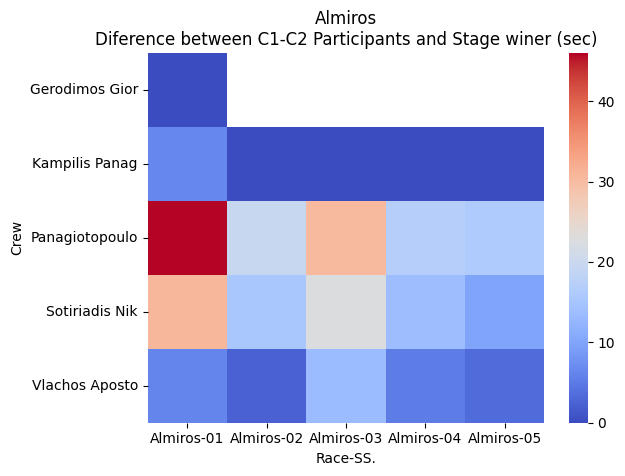

In [14]:
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between C1-C2 Participants and Stage winer (sec)')
plt.savefig((rallyname) + "Heatmap_C1.png")

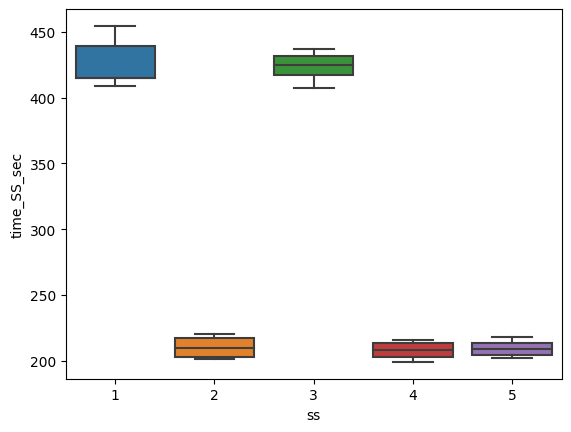

In [15]:
bplt=sns.boxplot( y=ss_times_C6["time_SS_sec"], x=ss_times_C6["ss"])

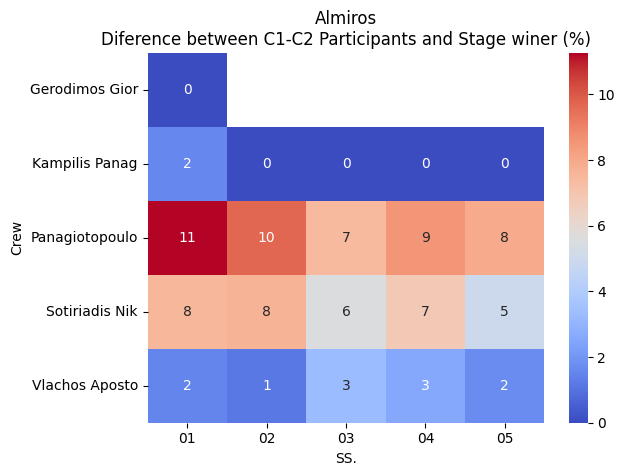

In [16]:
ss_timesa = pd.pivot_table(ss_times_C6, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between C1-C2 Participants and Stage winer (%)')
plt.savefig(rallyname + "C1.jpg")